# Maximum likelihood exercise solutions

## Exercise 10.1

Write a library of functions to determine the parameter &tau; of an exponential distribution
from a list of numbers filled with pseudo-random numbers
distributed according to an exponential probability density distribution.
  * Compare the result obtained with the mean of the numbers saved in the list.
  * How does the result depend on the initial interval passed to the ```sezione_aurea_max_LL``` function?

In [1]:
from myrand import generate_exp
from likelihood import sezioneAureaMax_LL, exp_pdf, loglikelihood

tau_true  = 2.
N_evt     = 50

sample = generate_exp (tau_true, N_evt)
tau_hat = sezioneAureaMax_LL (loglikelihood, exp_pdf, sample, 0.5, 5., 0.0001)
print ('il valore di tau che massimizza il logaritmo della verosimiglianza è:', tau_hat)


il valore di tau che massimizza il logaritmo della verosimiglianza è: 2.1517029042327476


## Exercise 10.2

  * Plot the profile of the likelihood function and the point identified as its maximum.

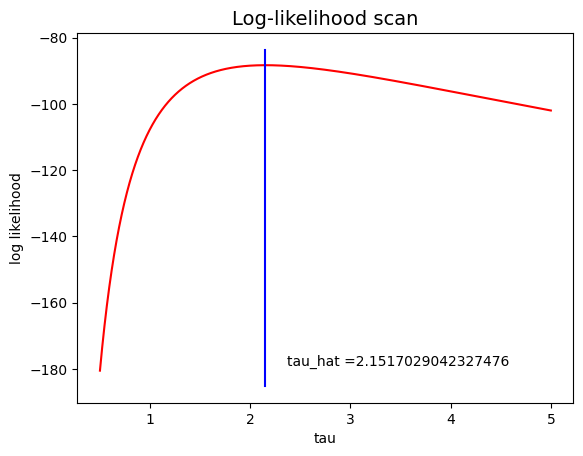

In [2]:
from likelihood import loglikelihood
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots ()
ax.set_title ('Log-likelihood scan', size=14)
ax.set_xlabel ('tau')
ax.set_ylabel ('log likelihood')

tauaxis = np.linspace (0.5, 5., 10000)
ll      = np.arange (0., tauaxis.size)

for i in range (tauaxis.size) :
    ll[i] = loglikelihood (tauaxis[i], exp_pdf, sample)

plt.plot (tauaxis, ll, 'r')
plt.plot ([tau_hat, tau_hat],ax.get_ylim (), color = 'blue')
plt.text (tau_hat * 1.1, plt.ylim ()[0] + 0.1 * (ax.get_ylim ()[1] - ax.get_ylim ()[0]), 'tau_hat =' + str (tau_hat))
plt.show ()

## Exercise 10.3

 * Modify the ```sezione_aurea_max_LL``` function,
   adding the printing of the interval endpoint values at each iteration,
   to observe the narrowing of the interval during program execution.

## Exercise 10.4

* Modify the ```loglikelihood``` function to calculate the logarithm of the product
   of the values of the probability density function, rather than the sum of individual logarithms.
   How does the algorithm's behavior change?

il valore di tau che massimizza il logaritmo della verosimiglianza è: 2.1517029042327476


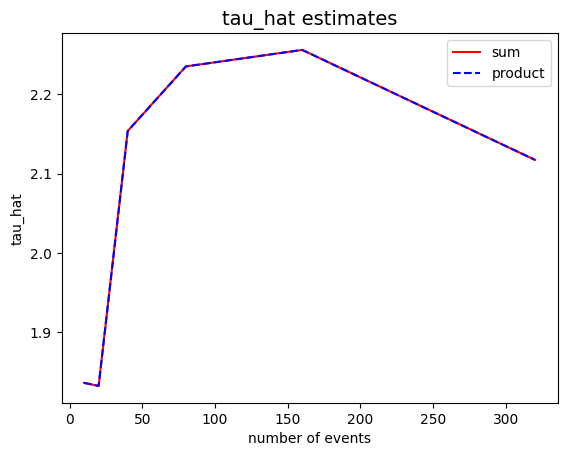

In [3]:
from myrand import generate_exp
from likelihood import loglikelihood_prod

N_evt_big = 500
sample_big = generate_exp (tau_true, N_evt_big)

N_evt_test = 10
tau_hat_sums = []
tau_hat_pros = []
N_evt_range = []
while (N_evt_test <= N_evt_big) :
    subsample = sample_big[:N_evt_test]
    tau_hat_sums.append (sezioneAureaMax_LL (loglikelihood, exp_pdf, subsample, 0.5, 5., 0.0001))
    tau_hat_pros.append (sezioneAureaMax_LL (loglikelihood_prod, exp_pdf, subsample, 0.5, 5., 0.0001))
    N_evt_range.append (N_evt_test)
    N_evt_test = N_evt_test * 2

fig, ax = plt.subplots ()
ax.set_title ('tau_hat estimates', size=14)
ax.set_xlabel ('number of events')
ax.set_ylabel ('tau_hat')
ax.plot (N_evt_range, tau_hat_sums, color = 'red', label = 'sum')
ax.plot (N_evt_range, tau_hat_pros, color = 'blue', linestyle = "dashed", label = 'product')
ax.legend ()

print ('il valore di tau che massimizza il logaritmo della verosimiglianza è:', tau_hat)


## Exercise 10.5

Graphically show that as the available sample size increases,
the profile of the logarithm of the likelihood function becomes narrower.
  * To simplify visualization, use the logarithm of the ratio
  between the likelihood function and its maximum value:
  
  $LLR\:(\theta) = \log \left( \dfrac{\mathcal{L}(\theta)}{\mathcal{L}(\hat{\theta})} \right)$

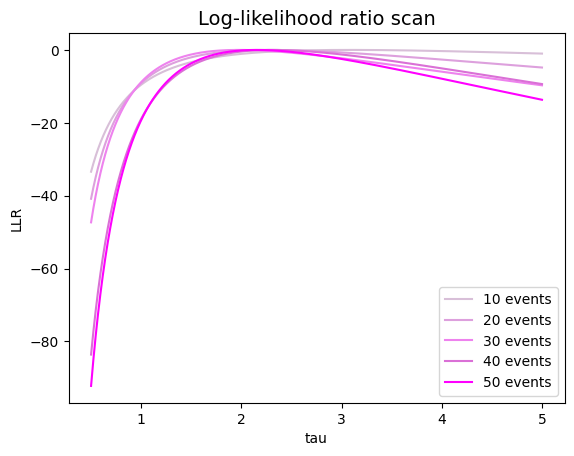

In [4]:
from likelihood import loglikelihood_ratio

sample_size = 10

fig, ax = plt.subplots ()
ax.set_title ('Log-likelihood ratio scan', size=14)
ax.set_xlabel ('tau')
ax.set_ylabel ('LLR')
tauaxis = np.linspace (0.5, 5., 10000)
colors = [
          'thistle',
          'plum',
          'violet',
          'orchid',
          'fuchsia',
          'mediumpurple',
          'purple',
         ]
index = 0
while sample_size <= N_evt :
    # create a subsample
    subsample = sample[:int (sample_size)]
    llr = np.arange (0., tauaxis.size)
    for i in range (tauaxis.size) :
        tau_hat = sezioneAureaMax_LL (loglikelihood, exp_pdf, subsample, 0.5, 5., 0.0001)    
        llr[i] = loglikelihood_ratio (tauaxis[i], exp_pdf, subsample, tau_hat)
    plt.plot (tauaxis, llr, color = colors[index], label = str (sample_size) + ' events')
    index = index + 1
    sample_size = sample_size + 10

plt.legend ()
plt.show ()

## Exercise 10.6

Use the bisection method to find the two points
*&tau; - &sigma;<sub>&tau;</sub>* and *&tau; + &sigma;<sub>&tau;</sub>*
related to Exercise 1.
  * Plot the log-likelihood profile, the estimator values, and the confidence interval
    along with the horizontal segment used for its determination.

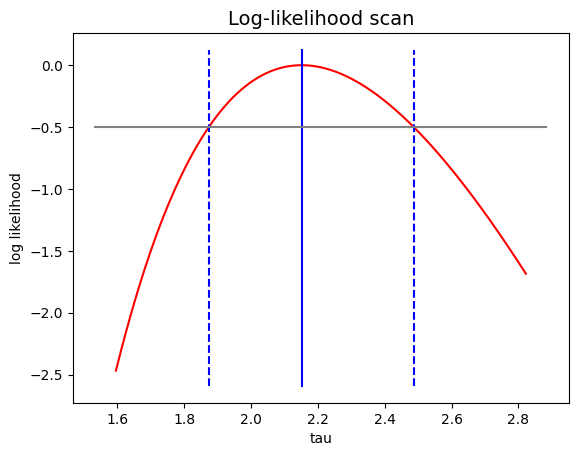

In [7]:
from likelihood import intersect_LLR

tau_hat = sezioneAureaMax_LL (loglikelihood, exp_pdf, sample, 0.5, 5., 0.0001)    
tau_hat_minusS = intersect_LLR (loglikelihood_ratio, exp_pdf, sample, 0.5, tau_hat, -0.5, tau_hat)
tau_hat_plusS = intersect_LLR (loglikelihood_ratio, exp_pdf, sample, tau_hat, 5., -0.5, tau_hat)

fig, ax = plt.subplots ()
ax.set_title ('Log-likelihood scan', size=14)
ax.set_xlabel ('tau')
ax.set_ylabel ('log likelihood')

# choose a reasonable range around tau_hat, measured in terms of the confidence interval
xMin = tau_hat_minusS - (tau_hat - tau_hat_minusS)
xMax = tau_hat_plusS + (tau_hat_plusS - tau_hat)

tauaxis = np.linspace (xMin, xMax, 10000)
llr     = np.arange (0., tauaxis.size)
for i in range (tauaxis.size) :
    llr[i] = loglikelihood_ratio (tauaxis[i], exp_pdf, sample, tau_hat)

plt.plot (tauaxis, llr, 'r')
limits = ax.get_ylim ()
plt.plot ([tau_hat, tau_hat], limits, color = 'blue')
plt.plot ([tau_hat_minusS, tau_hat_minusS], limits, color = 'blue', linestyle = 'dashed')
plt.plot ([tau_hat_plusS, tau_hat_plusS], limits, color = 'blue', linestyle = 'dashed')
plt.plot (plt.xlim (), [-0.5, -0.5], color = 'gray')

plt.show ()

## Exercise 10.7

Using the toy experiments technique,
plot the probability distribution of the &tau; estimator.
  * Overlay the generated histogram with the plot of the estimator and the confidence interval
    found in the previous exercise.
  * Compare the value of *&sigma;<sub>&tau;</sub>* obtained in the previous exercise
    with the one calculated from the distribution of the numbers saved in the list.

sigma ricavata dai toy:       0.2843224207360238
sigma con il metodo grafico:  0.30647450558155054


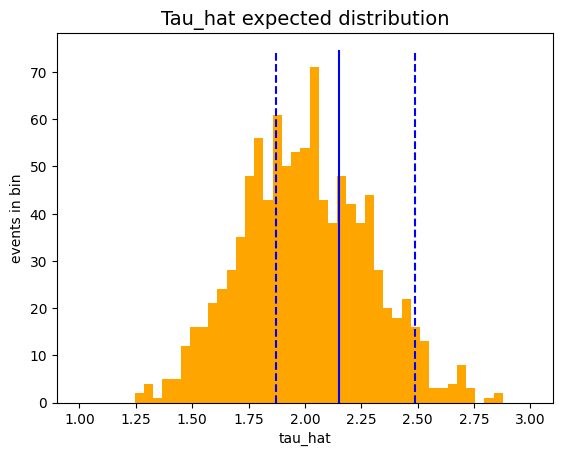

In [9]:
from math import floor
from stats import stats
    
#tau_true = 2.
N_evt    = 50
N_toys   = 1000

tau_hats = []
# loop over toy experiments
for iToy in range (N_toys) :
    singleToy = generate_exp (tau_true, N_evt)
    tau_hat_toy = sezioneAureaMax_LL (loglikelihood, exp_pdf, singleToy, 0.5, 5., 0.0001)
    tau_hats.append (tau_hat_toy)

xMin = 1.
xMax = 3.
bin_edges = np.linspace (xMin, xMax, floor (N_toys/20))   # edges o the histogram bins

fig, ax = plt.subplots ()
ax.set_title ('Tau_hat expected distribution', size=14)
ax.set_xlabel('tau_hat')
ax.set_ylabel('events in bin')
ax.hist (tau_hats,
         bins = bin_edges,
         color = 'orange',
        )

limits = ax.get_ylim ()
plt.plot ([tau_hat, tau_hat], limits, color = 'blue')
plt.plot ([tau_hat_minusS, tau_hat_minusS], limits, color = 'blue', linestyle = 'dashed')
plt.plot ([tau_hat_plusS, tau_hat_plusS], limits, color = 'blue', linestyle = 'dashed')

toy_stats = stats (tau_hats)
print ('sigma ricavata dai toy:      ', toy_stats.sigma ())
print ('sigma con il metodo grafico: ', 0.5 * (tau_hat_plusS - tau_hat_minusS))

plt.show ()


## Exercise 10.8

In the asymptotic regime,
the distribution of the differences *(&tau; - &tau;<sub>true</sub>) / &sigma;<sub>&tau;</sub>* 
follows a Normal distribution.
  * Use the toy experiments method to fill the histogram of the differences,
    given a number of events per toy experiment.
  * Calculate the mean and sigma of the distribution of differences,
    and plot their values as a function of the number of events available for estimation,
    showing the trend on a graph with the number of events available on the horizontal axis
    and the parameter value on the vertical axis.

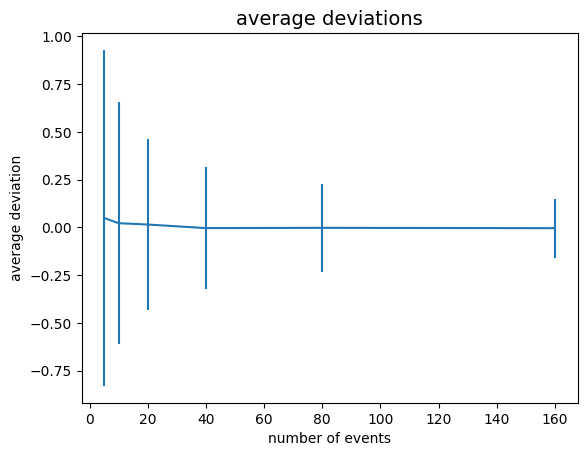

In [10]:

N_evt_big = 200
sample_size = 5

N_events   = []
deviations = []
sigmas     = []
while sample_size <= N_evt_big :
    scarti = []
    # loop over toy experiments
    for iToy in range (N_toys) :
        singleToy = generate_exp (tau_true, sample_size)
        tau_hat_toy = sezioneAureaMax_LL (loglikelihood, exp_pdf, singleToy, 0.5, 5., 0.0001)
        scarti.append (tau_hat_toy - tau_true)
    toy_stats = stats (scarti)
    deviations.append (toy_stats.mean ())
    sigmas.append (toy_stats.sigma ())
    N_events.append (sample_size)
    sample_size = sample_size * 2

fig, ax = plt.subplots ()
ax.set_title ('average deviations', size=14)
ax.set_xlabel ('number of events')
ax.set_ylabel ('average deviation')
ax.errorbar (N_events, deviations, xerr = 0.0, yerr = sigmas) 
plt.show ()
